<a href="https://colab.research.google.com/github/gangulyarin/All_State_Purchase_Prediction/blob/main/AllStatePurchasePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q kaggle

In [2]:
! mkdir ~/.kaggle

In [3]:
! rm ~/.kaggle/kaggle.json

rm: cannot remove '/root/.kaggle/kaggle.json': No such file or directory


In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle competitions download -c allstate-purchase-prediction-challenge

100% 7.56M/7.56M [00:01<00:00, 12.4MB/s]
100% 7.56M/7.56M [00:01<00:00, 7.53MB/s]


In [7]:
import zipfile
with zipfile.ZipFile('allstate-purchase-prediction-challenge.zip') as zf:
  zf.extractall('')

In [8]:
import zipfile
with zipfile.ZipFile('train.csv.zip') as zf:
  zf.extractall('')

In [9]:
import pandas as pd

data = pd.read_csv("train.csv")
data.head()

,customer_ID,shopping_pt,record_type,day,time,state,location,group_size,homeowner,car_age,...,C_previous,duration_previous,A,B,C,D,E,F,G,cost
0,10000000,1,0,0,08:35,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,2,633
1,10000000,2,0,0,08:38,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,630
2,10000000,3,0,0,08:38,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,630
3,10000000,4,0,0,08:39,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,630
4,10000000,5,0,0,11:55,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,630


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665249 entries, 0 to 665248
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   customer_ID        665249 non-null  int64  
 1   shopping_pt        665249 non-null  int64  
 2   record_type        665249 non-null  int64  
 3   day                665249 non-null  int64  
 4   time               665249 non-null  object 
 5   state              665249 non-null  object 
 6   location           665249 non-null  int64  
 7   group_size         665249 non-null  int64  
 8   homeowner          665249 non-null  int64  
 9   car_age            665249 non-null  int64  
 10  car_value          663718 non-null  object 
 11  risk_factor        424831 non-null  float64
 12  age_oldest         665249 non-null  int64  
 13  age_youngest       665249 non-null  int64  
 14  married_couple     665249 non-null  int64  
 15  C_previous         646538 non-null  float64
 16  du

In [11]:
data.isna().sum()

customer_ID               0
shopping_pt               0
record_type               0
day                       0
time                      0
state                     0
location                  0
group_size                0
homeowner                 0
car_age                   0
car_value              1531
risk_factor          240418
age_oldest                0
age_youngest              0
married_couple            0
C_previous            18711
duration_previous     18711
A                         0
B                         0
C                         0
D                         0
E                         0
F                         0
G                         0
cost                      0
dtype: int64

In [12]:
data['state'].value_counts()

FL    106287
NY     91627
PA     60677
OH     44537
MD     28443
IN     25295
WA     25188
CO     24409
AL     23560
CT     19353
TN     18099
KY     16100
NV     15459
MO     15243
OR     15068
UT     14820
OK     13779
MS     10722
AR     10460
WI     10103
GA      8802
NH      7988
ME      6800
NM      6790
ID      6110
RI      5887
KS      5585
WV      5053
IA      4545
DE      4101
DC      3748
MT      3332
NE      3121
ND      2487
WY      1163
SD       508
Name: state, dtype: int64

In [13]:
data['car_value'].value_counts()

e    219251
f    177204
d    113174
g     98152
h     28976
c     20820
i      3603
b      1402
a      1136
Name: car_value, dtype: int64

In [15]:
data['car_value'].mode()[0]

'e'

In [16]:
data.fillna({'car_value':data['car_value'].mode()[0]},inplace=True)

In [17]:
data['car_value'].isna().sum()

0

In [19]:
for col in data.columns:
  if data[col].dtypes!='O':
    data[col] = data[col].fillna(data[col].mean())
data.isna().sum()

customer_ID          0
shopping_pt          0
record_type          0
day                  0
time                 0
state                0
location             0
group_size           0
homeowner            0
car_age              0
car_value            0
risk_factor          0
age_oldest           0
age_youngest         0
married_couple       0
C_previous           0
duration_previous    0
A                    0
B                    0
C                    0
D                    0
E                    0
F                    0
G                    0
cost                 0
dtype: int64

In [22]:
data['time'] = pd.to_datetime(data['time'])

In [27]:
data['hour'] = data['time'].dt.hour
data['minute'] = data['time'].dt.minute

In [30]:
data.drop(columns=['time'],inplace=True)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665249 entries, 0 to 665248
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   customer_ID        665249 non-null  int64  
 1   shopping_pt        665249 non-null  int64  
 2   record_type        665249 non-null  int64  
 3   day                665249 non-null  int64  
 4   state              665249 non-null  object 
 5   location           665249 non-null  int64  
 6   group_size         665249 non-null  int64  
 7   homeowner          665249 non-null  int64  
 8   car_age            665249 non-null  int64  
 9   car_value          665249 non-null  object 
 10  risk_factor        665249 non-null  float64
 11  age_oldest         665249 non-null  int64  
 12  age_youngest       665249 non-null  int64  
 13  married_couple     665249 non-null  int64  
 14  C_previous         665249 non-null  float64
 15  duration_previous  665249 non-null  float64
 16  A 

In [32]:
for col in data.columns:
  if data[col].dtypes=='O':
    data[col] = data[col].astype('category').cat.codes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665249 entries, 0 to 665248
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   customer_ID        665249 non-null  int64  
 1   shopping_pt        665249 non-null  int64  
 2   record_type        665249 non-null  int64  
 3   day                665249 non-null  int64  
 4   state              665249 non-null  int8   
 5   location           665249 non-null  int64  
 6   group_size         665249 non-null  int64  
 7   homeowner          665249 non-null  int64  
 8   car_age            665249 non-null  int64  
 9   car_value          665249 non-null  int8   
 10  risk_factor        665249 non-null  float64
 11  age_oldest         665249 non-null  int64  
 12  age_youngest       665249 non-null  int64  
 13  married_couple     665249 non-null  int64  
 14  C_previous         665249 non-null  float64
 15  duration_previous  665249 non-null  float64
 16  A 

In [33]:
import numpy as np

def remove_outliers(col,train_data):
  Q1 = train_data[col].quantile(0.25)
  Q3 = train_data[col].quantile(0.75)
  IQR = Q3-Q1
  lb = Q1-1.5*IQR
  ub = Q3+1.5*IQR
  train_data[col] = np.where(train_data[col]<lb,lb,train_data[col])
  train_data[col] = np.where(train_data[col]>ub,ub,train_data[col])

for col in data.columns:
  remove_outliers(col,data)

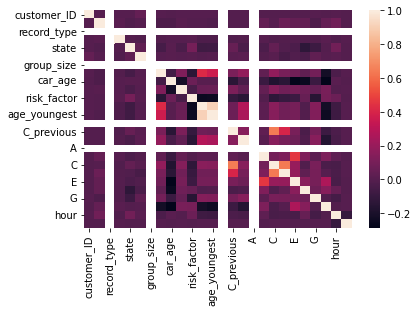

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(data.corr())
plt.show()

In [38]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[data.columns] = scaler.fit_transform(data)


In [39]:
data.head()

,customer_ID,shopping_pt,record_type,day,state,location,group_size,homeowner,car_age,car_value,...,A,B,C,D,E,F,G,cost,hour,minute
0,0.0,0.000000,0.0,0.0,0.285714,0.0,0.0,0.0,0.078431,0.875,...,0.0,0.0,0.333333,0.5,1.0,0.666667,0.333333,0.491667,0.275,0.593220
1,0.0,0.090909,0.0,0.0,0.285714,0.0,0.0,0.0,0.078431,0.875,...,0.0,0.0,0.333333,0.5,1.0,0.666667,0.000000,0.479167,0.275,0.644068
2,0.0,0.181818,0.0,0.0,0.285714,0.0,0.0,0.0,0.078431,0.875,...,0.0,0.0,0.333333,0.5,1.0,0.666667,0.000000,0.479167,0.275,0.644068
3,0.0,0.272727,0.0,0.0,0.285714,0.0,0.0,0.0,0.078431,0.875,...,0.0,0.0,0.333333,0.5,1.0,0.666667,0.000000,0.479167,0.275,0.661017
4,0.0,0.363636,0.0,0.0,0.285714,0.0,0.0,0.0,0.078431,0.875,...,0.0,0.0,0.333333,0.5,1.0,0.666667,0.000000,0.479167,0.425,0.932203


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['cost']),data['cost'])

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
preds = rfr.predict(X_test)
mean_squared_error(preds,y_test)

0.0041515038459110235